# File to explore time dependant data and create (preliminary plots)

In [ ]:
# Extract simulation times for all snapshots
# TODO





## Remove spikes in SEDs and images

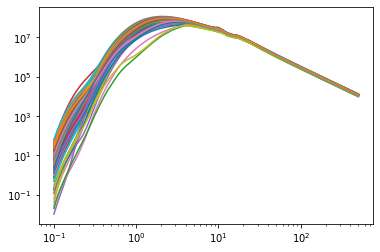

In [1]:
# Remove spikes from SED
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for phase in phases:
    for angle in angles:
        a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
        os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

        plt.plot(a,b)
        plt.xscale('log')
        plt.yscale('log')



In [3]:
# Remove spikes from Images
import analyze_r3d_functions as a3d
import os

folder = '../r3dresults/st28gm06n052_timedep'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_10um.out'
]
for phase in phases:
    print(f'Doing phase {phase}')
    for image in images:

        image1d = a3d.remove_imagespikes(
            folders = [
                f'{folder}_1/{phase}/',
                f'{folder}_2/{phase}/',
            ],
            imagefilename = image
        )
        os.system(f'mv ../{image} {folder}_nospikes/{phase}/')


## Plot Images

In [ ]:
# plot time-series images in each direction
# one for each dicrection
# TODO

## Plot SEDs

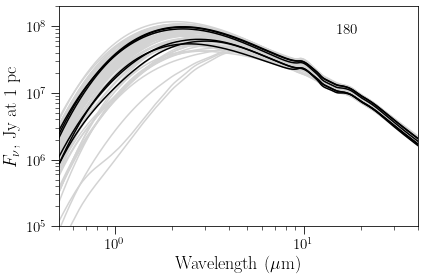

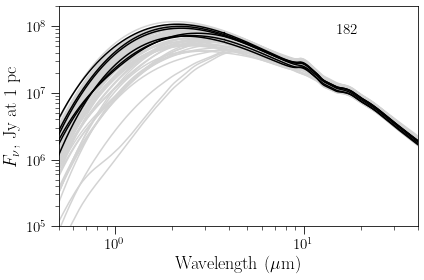

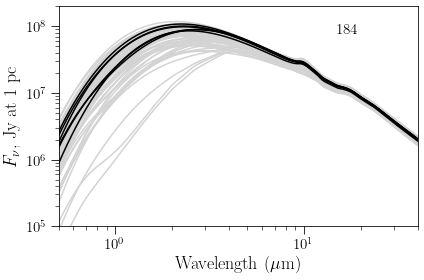

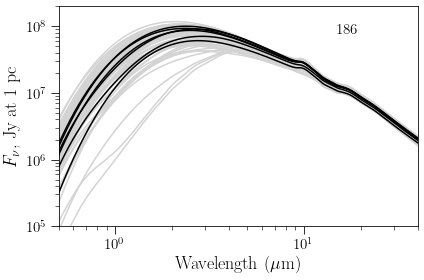

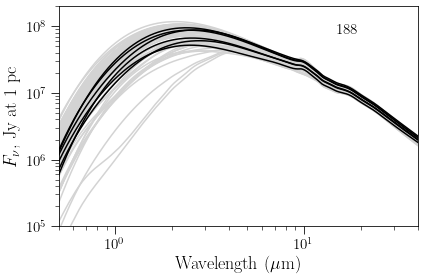

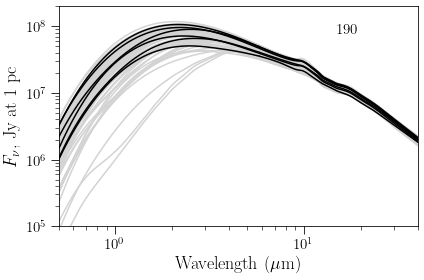

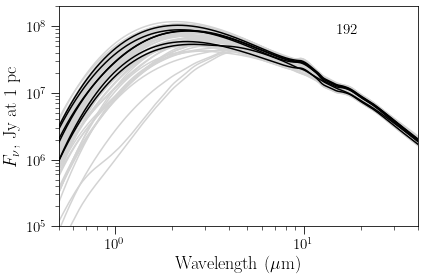

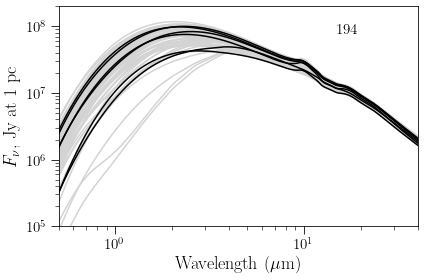

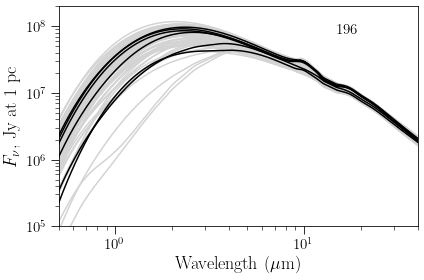

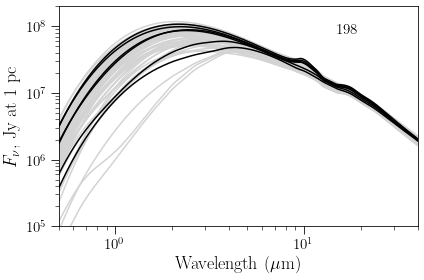

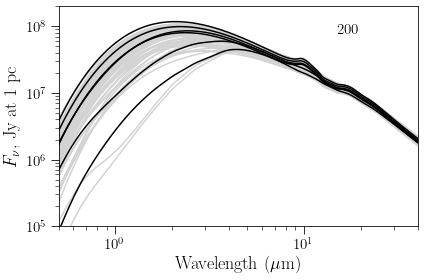

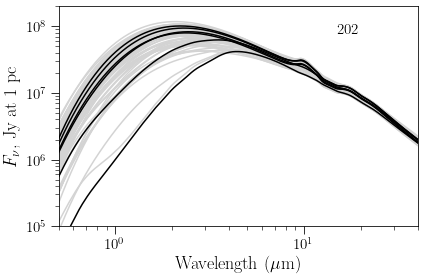

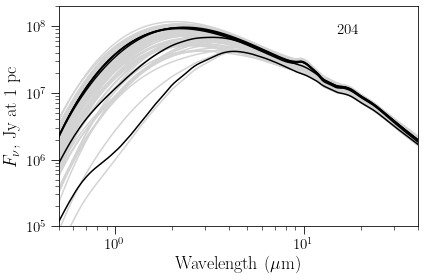

In [16]:
# For talks
# Plot all SEDs in the same figure, highlight one snapshot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

folder = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [
    '180',
    '182',
    '184',
    '186',
    '188',
    '190',
    '192',
    '194',
    '196',
    '198',
    '200',
    '202',
    '204',
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Loop over high lighted snapshots
for hilitsnapshot in phases:

    # Set settings for each highlighted snapshotplot
    fig, ax = plt.figure(
        hilitsnapshot, 
        figsize=(6, 4)
    ), plt.axes()
    ax.set(
        xscale='log',
        yscale='log',
        xlim=[0.5,40],
        ylim=[1e5,2e8]
    )
    ax.set_ylabel(r'$F_\nu$, Jy at 1 pc', fontsize=18)
    ax.set_xlabel(r'Wavelength ($\mu$m)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Load and plot all SEDs
    for phase in phases:
        for angle in angles:
            if phase != hilitsnapshot:
                wavelength, fluxes = a3d.load_spectrum(
                    path=f'{folder}{phase}/spectrum_{angle}.out'
                )
                ax.plot(wavelength,fluxes,'lightgrey')            

    # Load and plot hilite-snapshot
    for angle in angles:
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{folder}{hilitsnapshot}/spectrum_{angle}.out'
        )
        ax.plot(wavelength,fluxes,'k')
    # Add textbox with snapshot numer
    # TODO change this to simulation time!
    ax.text(
        x=15,y=8e7,
        s=hilitsnapshot,
        backgroundcolor='white',
        fontsize=15
    )
    # Save each in a separate file, for talks and suchs
    fig.tight_layout()
    fig.savefig(
        f'figs/seds_snapshot_{hilitsnapshot}.pdf', 
        dpi=300, 
        facecolor='white'
    )




In [1]:
# temp

import create_r3d_functions as c3d


c3d.write_r3d_runscripts(
    path = '../',
    phase_list = [140],
    sed_angles_list = [
        [0,0],
        [90,0],
        [180,0],
        [270,0],
        [90,90],
        [90,270],
    ],
    image_wavelength_list = [1,10],
    image_angles_list = [
        [0,0],
        [90,0],
        [180,0],
        [270,0],
        [90,90],
        [90,270],
    ],
    image_sizeau = 30,
    image_npix = 512,
    Nscripts = 3
)






Finished writing run-r3d-scripts (dont forget > chmod +x on them)



In [21]:
lista = ['a','b','c','d','e','f','g']

nfiles = 8

nlines_perfile_real = len(lista)/nfiles 
nlines_perfile = int(len(lista)/nfiles)

for nfile in range(nfiles):
    lines = lista[
        nlines_perfile*nfile:nlines_perfile*(nfile+1)
    ]

    for line in lines:
        print(line)
    
    print()


if nlines_perfile != nlines_perfile_real:
    lines = lista[nlines_perfile*nfiles:]

    for line in lines:
        print(line)












a
b
c
d
e
f
g


In [9]:
import re

tesline = 'runcommand_140_5469871.sh'
print(re.split('_', tesline)[2][:-3])





5469871
